In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//src')

d:\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\notebooks
d:
OneDrive - Cardiff University
04 - Projects
20 - UKERC
03 - Code
flexibilitydwellings
notebooks
d:\


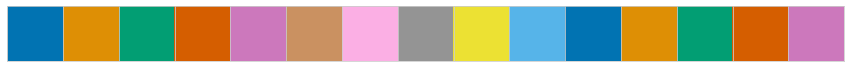

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
from matplotlib.ticker import MaxNLocator
import dwellings_characteristics.thermal_characteristics as th

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "png"
dpi = 1000
figsize = (12, 3.5)
figsize_map = (10, 6)
sns.palplot(sns.color_palette())

markers = ['x', 'o', '^', 's', '*', 'v']

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

ukerc_path_data = r'D:\OneDrive - Cardiff University\04 - Projects\20 - UKERC'
path_data = r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data" #computer_path + os.path.sep + r"Data" +os.path.sep +r"EPCs"
saving_path = r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\Domestic_EPC_results\EPC_thermal_capacity\\" #computer_path

## Load LSOA data

In [4]:
scenario = "before energy efficiency"
filename = "LSOAs_in_England_Wales_before_EE_heat_demand.csv"
thermal_characteristics_EW = th.ThermalCharacteristics(path_data, filename=filename, scenario=scenario)

thermal_characteristics_EW = (thermal_characteristics_EW
.load_data()
.map_LA_to_region()
.add_DD_and_design_temp(ukerc_path_data)
.remove_replace_outliers()
.calculate_thermal_losses()
.calculate_thermal_capacity()
.sum_thermal_parameters()
)

London
South East
South West
West Midlands
East Midlands
North West
North East
Yorkshire and The Humber
East
Wales
0.9 Quantile of flat oil boiler is 129.32
Max value of flat oil boiler is 137.64
0.9 Quantile of detached gas boiler is 316.74315789473684
Max value of detached gas boiler is 316.74315789473684
0.9 Quantile of detached resistance heating is 189.21488000000195
Max value of detached resistance heating is 189.53000000000003
0.9 Quantile of detached oil boiler is 278.03875
Max value of detached oil boiler is 279.92139999999995
0.9 Quantile of detached biomass boiler is 274.930600000002
Max value of detached biomass boiler is 277.665
0.9 Quantile of semi-detached gas boiler is 228.25
Max value of semi-detached gas boiler is 228.25
0.9 Quantile of semi-detached resistance heating is 133.89
Max value of semi-detached resistance heating is 133.89
0.9 Quantile of semi-detached oil boiler is 183.536
Max value of semi-detached oil boiler is 190.44666199999946
0.9 Quantile of semi-det

..//src\dwellings_characteristics\thermal_characteristics.py:369: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataf[temp_col_name] = dataf[floor_col] * 250 * 1.1  # kJ/m2/K
..//src\dwellings_characteristics\thermal_characteristics.py:372: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataf[temp_col_name] = dataf[floor_col] * 250 * 0.9  # kJ/m2/K
..//src\dwellings_characteristics\thermal_characteristics.py:391: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [5]:
lsoa_data = thermal_characteristics_EW.lsoa_data
lsoa_data.head()

,LSOA11CD,N_Households 2011,Rurality,MSOA11CD,LAD11CD,Local Authority,Detached No central heating 2011,Number of detached gas boiler in 2011,Number of detached resistance heating in 2011,Number of detached oil boiler in 2011,...,Total thermal losses semi-detached oil boiler kW/K,Total thermal losses semi-detached biomass boiler kW/K,Total thermal losses terraced gas boiler kW/K,Total thermal losses terraced resistance heating kW/K,Total thermal losses terraced oil boiler kW/K,Total thermal losses terraced biomass boiler kW/K,Total thermal losses flat gas boiler kW/K,Total thermal losses flat resistance heating kW/K,Total thermal losses flat biomass boiler kW/K,Total thermal losses kW/K
0,E01000001,876,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,0.0,...,0.0,0.0,0.695063,0.944184,0.0,0.000000,14.510947,40.505062,0.0,61.097372
1,E01000002,830,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,0.0,...,0.0,0.0,2.780252,3.021390,0.0,0.000000,8.650162,68.954474,0.0,86.235241
2,E01000003,817,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,0.0,...,0.0,0.0,2.085189,0.000000,0.0,0.000000,138.460134,20.890457,0.0,161.739732
3,E01000005,467,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,38.144816,9.456513,0.0,57.242769
4,E01000006,543,Rurality_Urban >10K,E02000017,E09000002,Barking and Dagenham,2.0,26.0,1.0,0.0,...,0.0,0.0,96.720388,1.191141,0.0,0.176764,4.703048,4.495307,0.0,164.995869


In [6]:
## export results

# full data
lsoa_data.to_csv(saving_path+'Thermal_characteristics_beforeEE_LSOA_EandW.csv') 

# compressed dataset
cols_to_export = ['Rurality', 
                  'MSOA11CD', 
                  'LAD11CD',
                  'Local Authority', 
                  'Total thermal losses kW/K',
                  'Total high thermal capacity GJ/K', 
                  'Design_temperature_degreeC']
lsoa_data[cols_to_export].to_csv(saving_path+'Thermal_characteristics_beforeEE_LSOA_EandW_SMALL.csv') 

## Based on annual heat demand after energy efficiency measures


In [7]:
scenario = "after energy efficiency"
filename = "LSOAs_in_England_Wales_after_EE_heat_demand.csv"
thermal_characteristics_EW = th.ThermalCharacteristics(path_data, filename=filename, scenario=scenario)

thermal_characteristics_EW = (thermal_characteristics_EW
.load_data()
.map_LA_to_region()
.add_DD_and_design_temp(ukerc_path_data)
.remove_replace_outliers()
.calculate_thermal_losses()
.calculate_thermal_capacity()
.sum_thermal_parameters()
)

London
South East
South West
West Midlands
East Midlands
North West
North East
Yorkshire and The Humber
East
Wales
0.9 Quantile of flat oil boiler is 128.2075
Max value of flat oil boiler is 137.64
0.9 Quantile of detached gas boiler is 315.5128384279476
Max value of detached gas boiler is 315.5128384279476
0.9 Quantile of detached resistance heating is 189.53000000000003
Max value of detached resistance heating is 189.53000000000003
0.9 Quantile of detached oil boiler is 278.03875
Max value of detached oil boiler is 278.03875
0.9 Quantile of detached biomass boiler is 270.0
Max value of detached biomass boiler is 273.96333333333314
0.9 Quantile of semi-detached gas boiler is 228.25
Max value of semi-detached gas boiler is 228.25
0.9 Quantile of semi-detached resistance heating is 133.89
Max value of semi-detached resistance heating is 133.89
0.9 Quantile of semi-detached oil boiler is 183.536
Max value of semi-detached oil boiler is 190.2
0.9 Quantile of semi-detached biomass boiler i

..//src\dwellings_characteristics\thermal_characteristics.py:369: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataf[temp_col_name] = dataf[floor_col] * 250 * 1.1  # kJ/m2/K
..//src\dwellings_characteristics\thermal_characteristics.py:372: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataf[temp_col_name] = dataf[floor_col] * 250 * 0.9  # kJ/m2/K
..//src\dwellings_characteristics\thermal_characteristics.py:391: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [8]:
lsoa_data = thermal_characteristics_EW.lsoa_data
lsoa_data

,LSOA11CD,N_Households 2011,Rurality,MSOA11CD,LAD11CD,Local Authority,Local Authority nospace,Detached No central heating 2011,Number of detached gas boiler in 2011,Number of detached resistance heating in 2011,...,Total thermal losses semi-detached oil boiler kW/K,Total thermal losses semi-detached biomass boiler kW/K,Total thermal losses terraced gas boiler kW/K,Total thermal losses terraced resistance heating kW/K,Total thermal losses terraced oil boiler kW/K,Total thermal losses terraced biomass boiler kW/K,Total thermal losses flat gas boiler kW/K,Total thermal losses flat resistance heating kW/K,Total thermal losses flat biomass boiler kW/K,Total thermal losses kW/K
0,E01000001,876,Rurality_Urban >10K,E02000001,E09000001,City of London,CityofLondon,0.0,0.0,0.0,...,0.000000,0.000000,0.436325,0.624560,0.0,0.000000,10.893073,30.006287,0.000000,44.773362
1,E01000002,830,Rurality_Urban >10K,E02000001,E09000001,City of London,CityofLondon,0.0,0.0,0.0,...,0.000000,0.000000,1.745302,1.998591,0.0,0.000000,6.288928,44.380236,0.000000,56.200936
2,E01000003,817,Rurality_Urban >10K,E02000001,E09000001,City of London,CityofLondon,0.0,0.0,0.0,...,0.000000,0.000000,1.308976,0.000000,0.0,0.000000,98.443792,14.757787,0.000000,114.701217
3,E01000005,467,Rurality_Urban >10K,E02000001,E09000001,City of London,CityofLondon,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,30.640939,6.627910,0.000000,43.331444
4,E01000006,543,Rurality_Urban >10K,E02000017,E09000002,Barking and Dagenham,BarkingandDagenham,2.0,26.0,1.0,...,0.000000,0.000000,60.914786,0.396546,0.0,0.119655,3.712873,2.940287,0.000000,106.780704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001954,637,Rurality_Urban >10K,W02000372,W06000015,Cardiff,Cardiff,0.0,274.0,0.0,...,0.000000,0.000000,11.067756,0.062646,0.0,0.000000,10.959124,2.961507,0.000000,182.659856
34749,W01001955,1153,Rurality_Urban >10K,W02000192,W06000011,Swansea,Swansea,0.0,10.0,6.0,...,0.216873,0.000000,7.975012,0.345171,0.0,0.000000,86.256454,17.244736,0.000000,119.086832
34750,W01001956,803,Rurality_Urban >10K,W02000190,W06000011,Swansea,Swansea,1.0,259.0,3.0,...,0.216873,0.164214,13.407650,1.087882,0.0,0.000000,9.688291,0.823602,0.080736,163.493106
34751,W01001957,411,Rurality_Urban >10K,W02000192,W06000011,Swansea,Swansea,0.0,3.0,1.0,...,0.000000,0.000000,44.346129,0.604049,0.0,0.148089,18.514949,3.022282,0.000000,72.344884


In [9]:
saving_path

'D:\\OneDrive - Cardiff University\\04 - Projects\\03 - PhD\\03 - Analysis\\03 - LSOAs\\00 - Data\\Domestic_EPC_results\\EPC_thermal_capacity\\\\'

In [10]:
## export results

# full data
lsoa_data.to_csv(saving_path+'Thermal_characteristics_afterEE_LSOA_EandW.csv') 

# compressed dataset
cols_to_export = ['Rurality', 
                  'MSOA11CD', 
                  'LAD11CD',
                  'Local Authority', 
                  'Total thermal losses kW/K',
                  'Total high thermal capacity GJ/K', 
                  'Design_temperature_degreeC']
lsoa_data[cols_to_export].to_csv(saving_path+'Thermal_characteristics_afterEE_LSOA_EandW_SMALL.csv') 